In [8]:
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv('G:\M.Sc\Python\LinearRegression\\advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


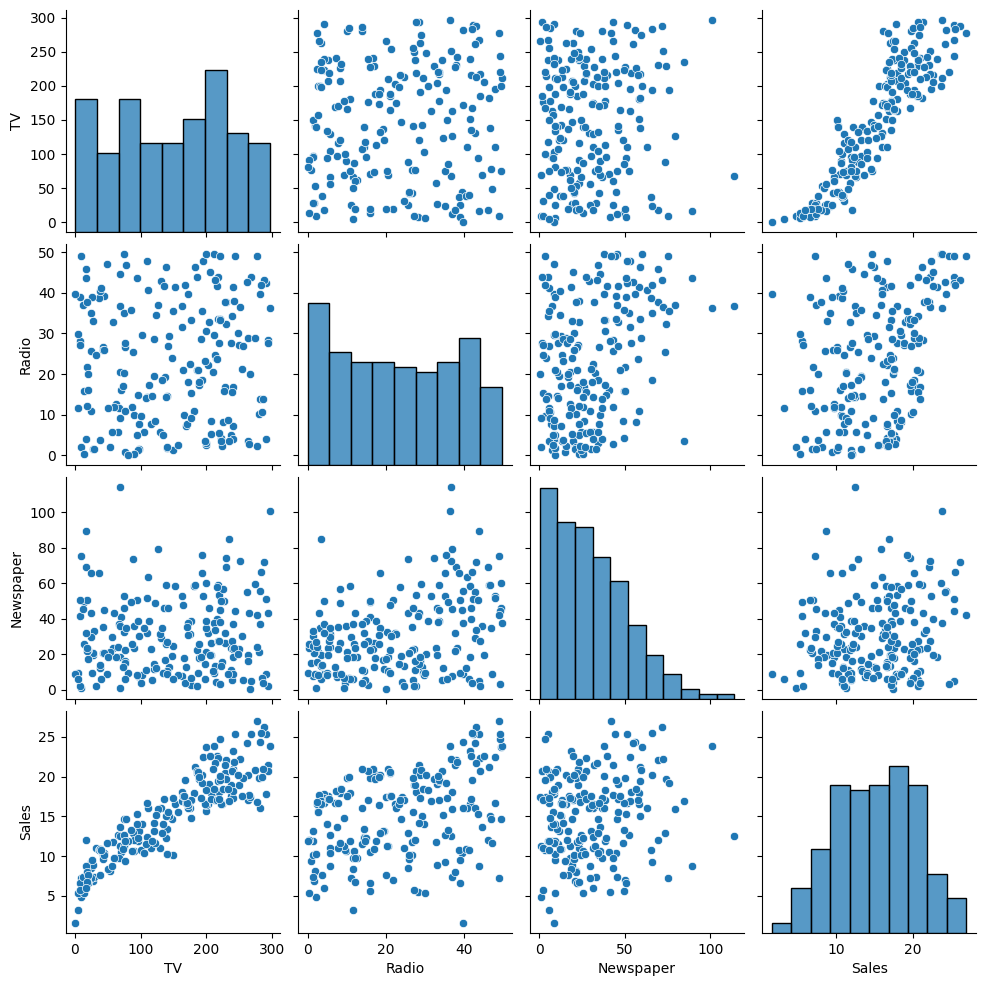

In [10]:
sns.pairplot(df)

In [11]:
from sklearn.model_selection import train_test_split
X = df[['TV']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print(f'Coefficent: {reg.coef_[0]: .2f} Intercept: {reg.intercept_: .2f}')

Coefficent:  0.05 Intercept:  7.21


In [13]:
y_pred = reg.predict(X_test)

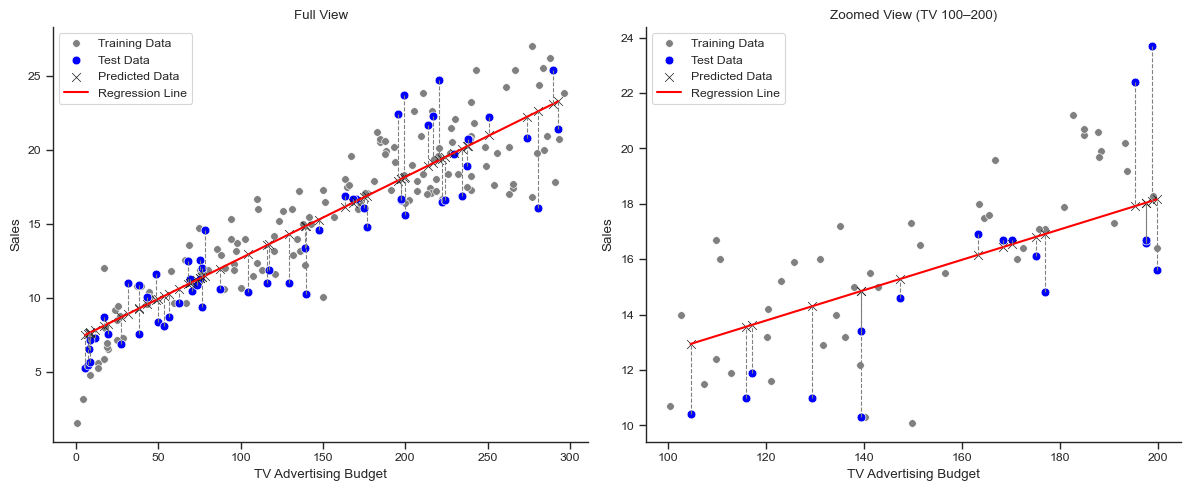

In [15]:
import matplotlib.pyplot as plt

# Simple academic theme
sns.set_theme(style="ticks", context="paper")

# Prepare dataframe
df_test = X_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# -------- MAIN PLOT --------
sns.scatterplot(x=X_train['TV'], y=y_train,
                color='gray', s=30,
                label='Training Data', ax=ax1)

sns.scatterplot(data=df_test, x='TV', y='Actual',
                color='blue', s=40,
                label='Test Data', ax=ax1)

sns.scatterplot(data=df_test, x='TV', y='Predicted',
                color='k', s=40, marker='x',
                label='Predicted Data', ax=ax1)

sns.lineplot(data=df_test.sort_values('TV'),
             x='TV', y='Predicted',
             color='red', linewidth=1.5,
             label='Regression Line', ax=ax1)

# Residual lines
for i in range(len(df_test)):
    ax1.plot(
        [df_test['TV'].iloc[i], df_test['TV'].iloc[i]],
        [df_test['Actual'].iloc[i], df_test['Predicted'].iloc[i]],
        linestyle='--', color='gray', linewidth=0.8
    )

ax1.set_title("Full View")
ax1.set_xlabel("TV Advertising Budget")
ax1.set_ylabel("Sales")
sns.despine(ax=ax1)

# -------- ZOOMED PLOT --------
zoom_min = 100
zoom_max = 200

# Filter training and test data for zoom
zoom_train = X_train[(X_train['TV'] >= zoom_min) & (X_train['TV'] <= zoom_max)]
zoom_y_train = y_train[zoom_train.index]

zoom_df = df_test[(df_test['TV'] >= zoom_min) & 
                  (df_test['TV'] <= zoom_max)]

# Training points in zoom
sns.scatterplot(x=zoom_train['TV'], y=zoom_y_train,
                color='gray', s=30,
                ax=ax2, label='Training Data')

# Test points in zoom
sns.scatterplot(data=zoom_df, x='TV', y='Actual',
                color='blue', s=40,
                ax=ax2, label='Test Data')

# Predicted points in zoom
sns.scatterplot(data=zoom_df, x='TV', y='Predicted',
                color='k', s=40, marker='x',
                ax=ax2, label='Predicted Data')

# Regression line in zoom
sns.lineplot(data=zoom_df.sort_values('TV'),
             x='TV', y='Predicted',
             color='red', linewidth=1.5,
             ax=ax2, label='Regression Line')

# Residual lines in zoom
for i in range(len(zoom_df)):
    ax2.plot(
        [zoom_df['TV'].iloc[i], zoom_df['TV'].iloc[i]],
        [zoom_df['Actual'].iloc[i], zoom_df['Predicted'].iloc[i]],
        linestyle='--', color='gray', linewidth=0.8
    )

ax2.set_title("Zoomed View (TV 100–200)")
ax2.set_xlabel("TV Advertising Budget")
ax2.set_ylabel("Sales")
sns.despine(ax=ax2)

plt.tight_layout()
plt.show()
